# Создание веб-приложения для демонстрации моделей машинного обучения.
***
## 1. Описание задания.
Разработайте макет веб-приложения, предназначенного для анализа данных.

Вариант 1. Макет должен быть реализован для одной модели машинного обучения. Макет должен позволять:

- задавать гиперпараметры алгоритма,
- производить обучение,
- осуществлять просмотр результатов обучения, в том числе в виде графиков.

Вариант 2. Макет должен быть реализован для нескольких моделей машинного обучения. Макет должен позволять:

- выбирать модели для обучения,
- производить обучение,
- осуществлять просмотр результатов обучения, в том числе в виде графиков.

## 2. Выполнение работы.

Для реализации веб-приложения используем фреймворк streamlit.

В качестве базы данных используем ранее применяемый датасет о винах, выращенных на разных винодельнях и решим для него задачу классификации.

В качестве модели машинного обучения будем использовать дерево решений.

Пользователь будет иметь возможность рассчитать лучший вариант глубины дерева или же указать его самостоятельно.

Для оценки будем использовать соответствующие метрики для задачи классификации. Наиболее наглядной будет метрика Матрицы ошибок.

Итоговый код программы:

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from io import StringIO
import graphviz 
import pydotplus
from sklearn.tree import export_graphviz

from sklearn.datasets import *
from sklearn.model_selection import train_test_split

@st.cache
def getData():
    wine = load_wine()
    pd_wine = pd.DataFrame(data= np.c_[wine['data'], wine['target']], columns= wine['feature_names'] + ['target'])
    return wine, pd_wine

@st.cache
def processData():
    return train_test_split(wine.data, wine.target, test_size=0.3, random_state=1)

def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

st.header('Исследование метода дерева решений')
'''
    Использование метода дерева решений с различными параметрами для датасета о вине.
'''
wine, pd_wine = getData()
wine_X_train, wine_X_test, wine_Y_train, wine_Y_test = processData()
st.write(pd_wine.head())

st.sidebar.header('Выбор параметров')

n_range = np.array(range(1, 15, 1))
tuned_parameters = [{'max_depth': n_range}]

if st.checkbox('Высчитать оптимальную глубину автоматически'):
    grid = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=5, scoring = 'accuracy')
    grid.fit(wine_X_train, wine_Y_train)
    param = grid.best_params_['max_depth']
else:
    n_levels = st.sidebar.slider('Глубина дерева:', min_value=1, max_value=15, value=1, step=1)
    param = n_levels

cl_ml = DecisionTreeClassifier(max_depth=param)
cl_ml.fit(wine_X_train, wine_Y_train)
st.image(get_png_tree(cl_ml, wine['feature_names']))

st.subheader('Метрики для оценки качества моделей')
fig, ax = plt.subplots(figsize=(7,7))    
plot_confusion_matrix(cl_ml, wine_X_test, wine_Y_test, ax=ax, display_labels=['0','1', '2'], cmap=plt.cm.Blues, normalize='true')
fig.suptitle('Матрица ошибок')
st.pyplot(fig)

Скриншоты полученного веб-приложения:

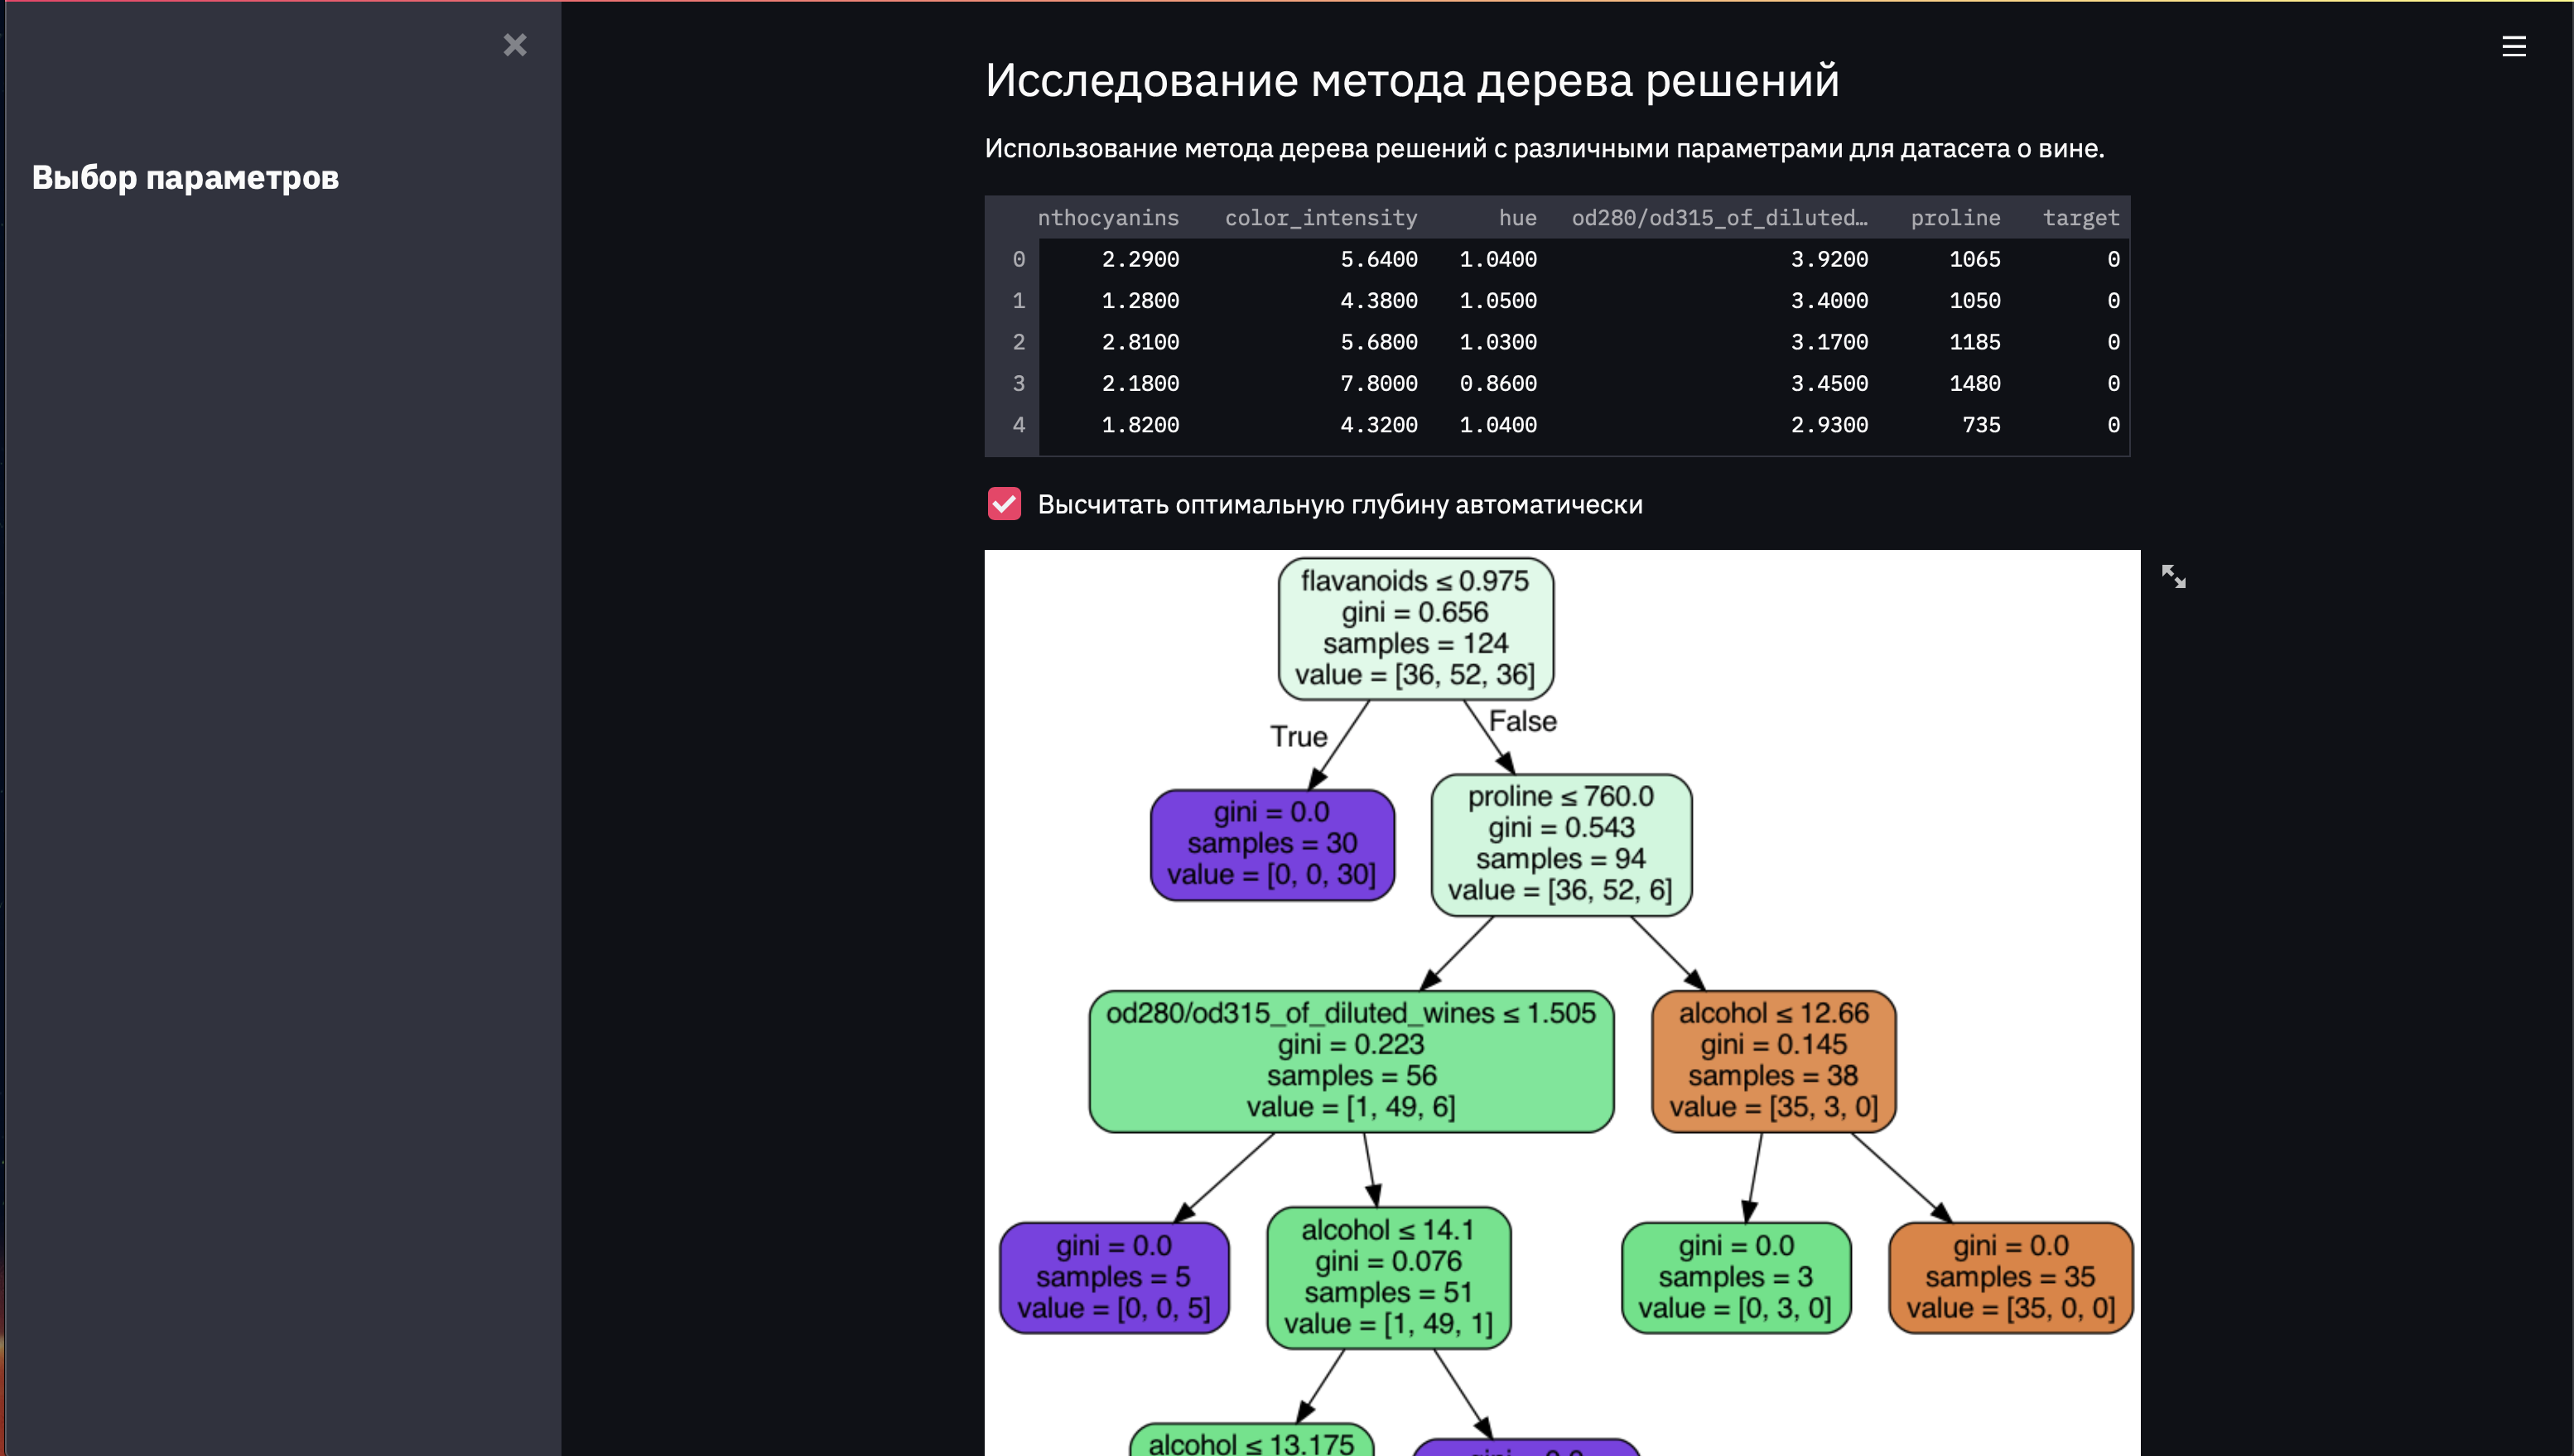

In [4]:
from IPython.display import Image
Image("img/first.png")

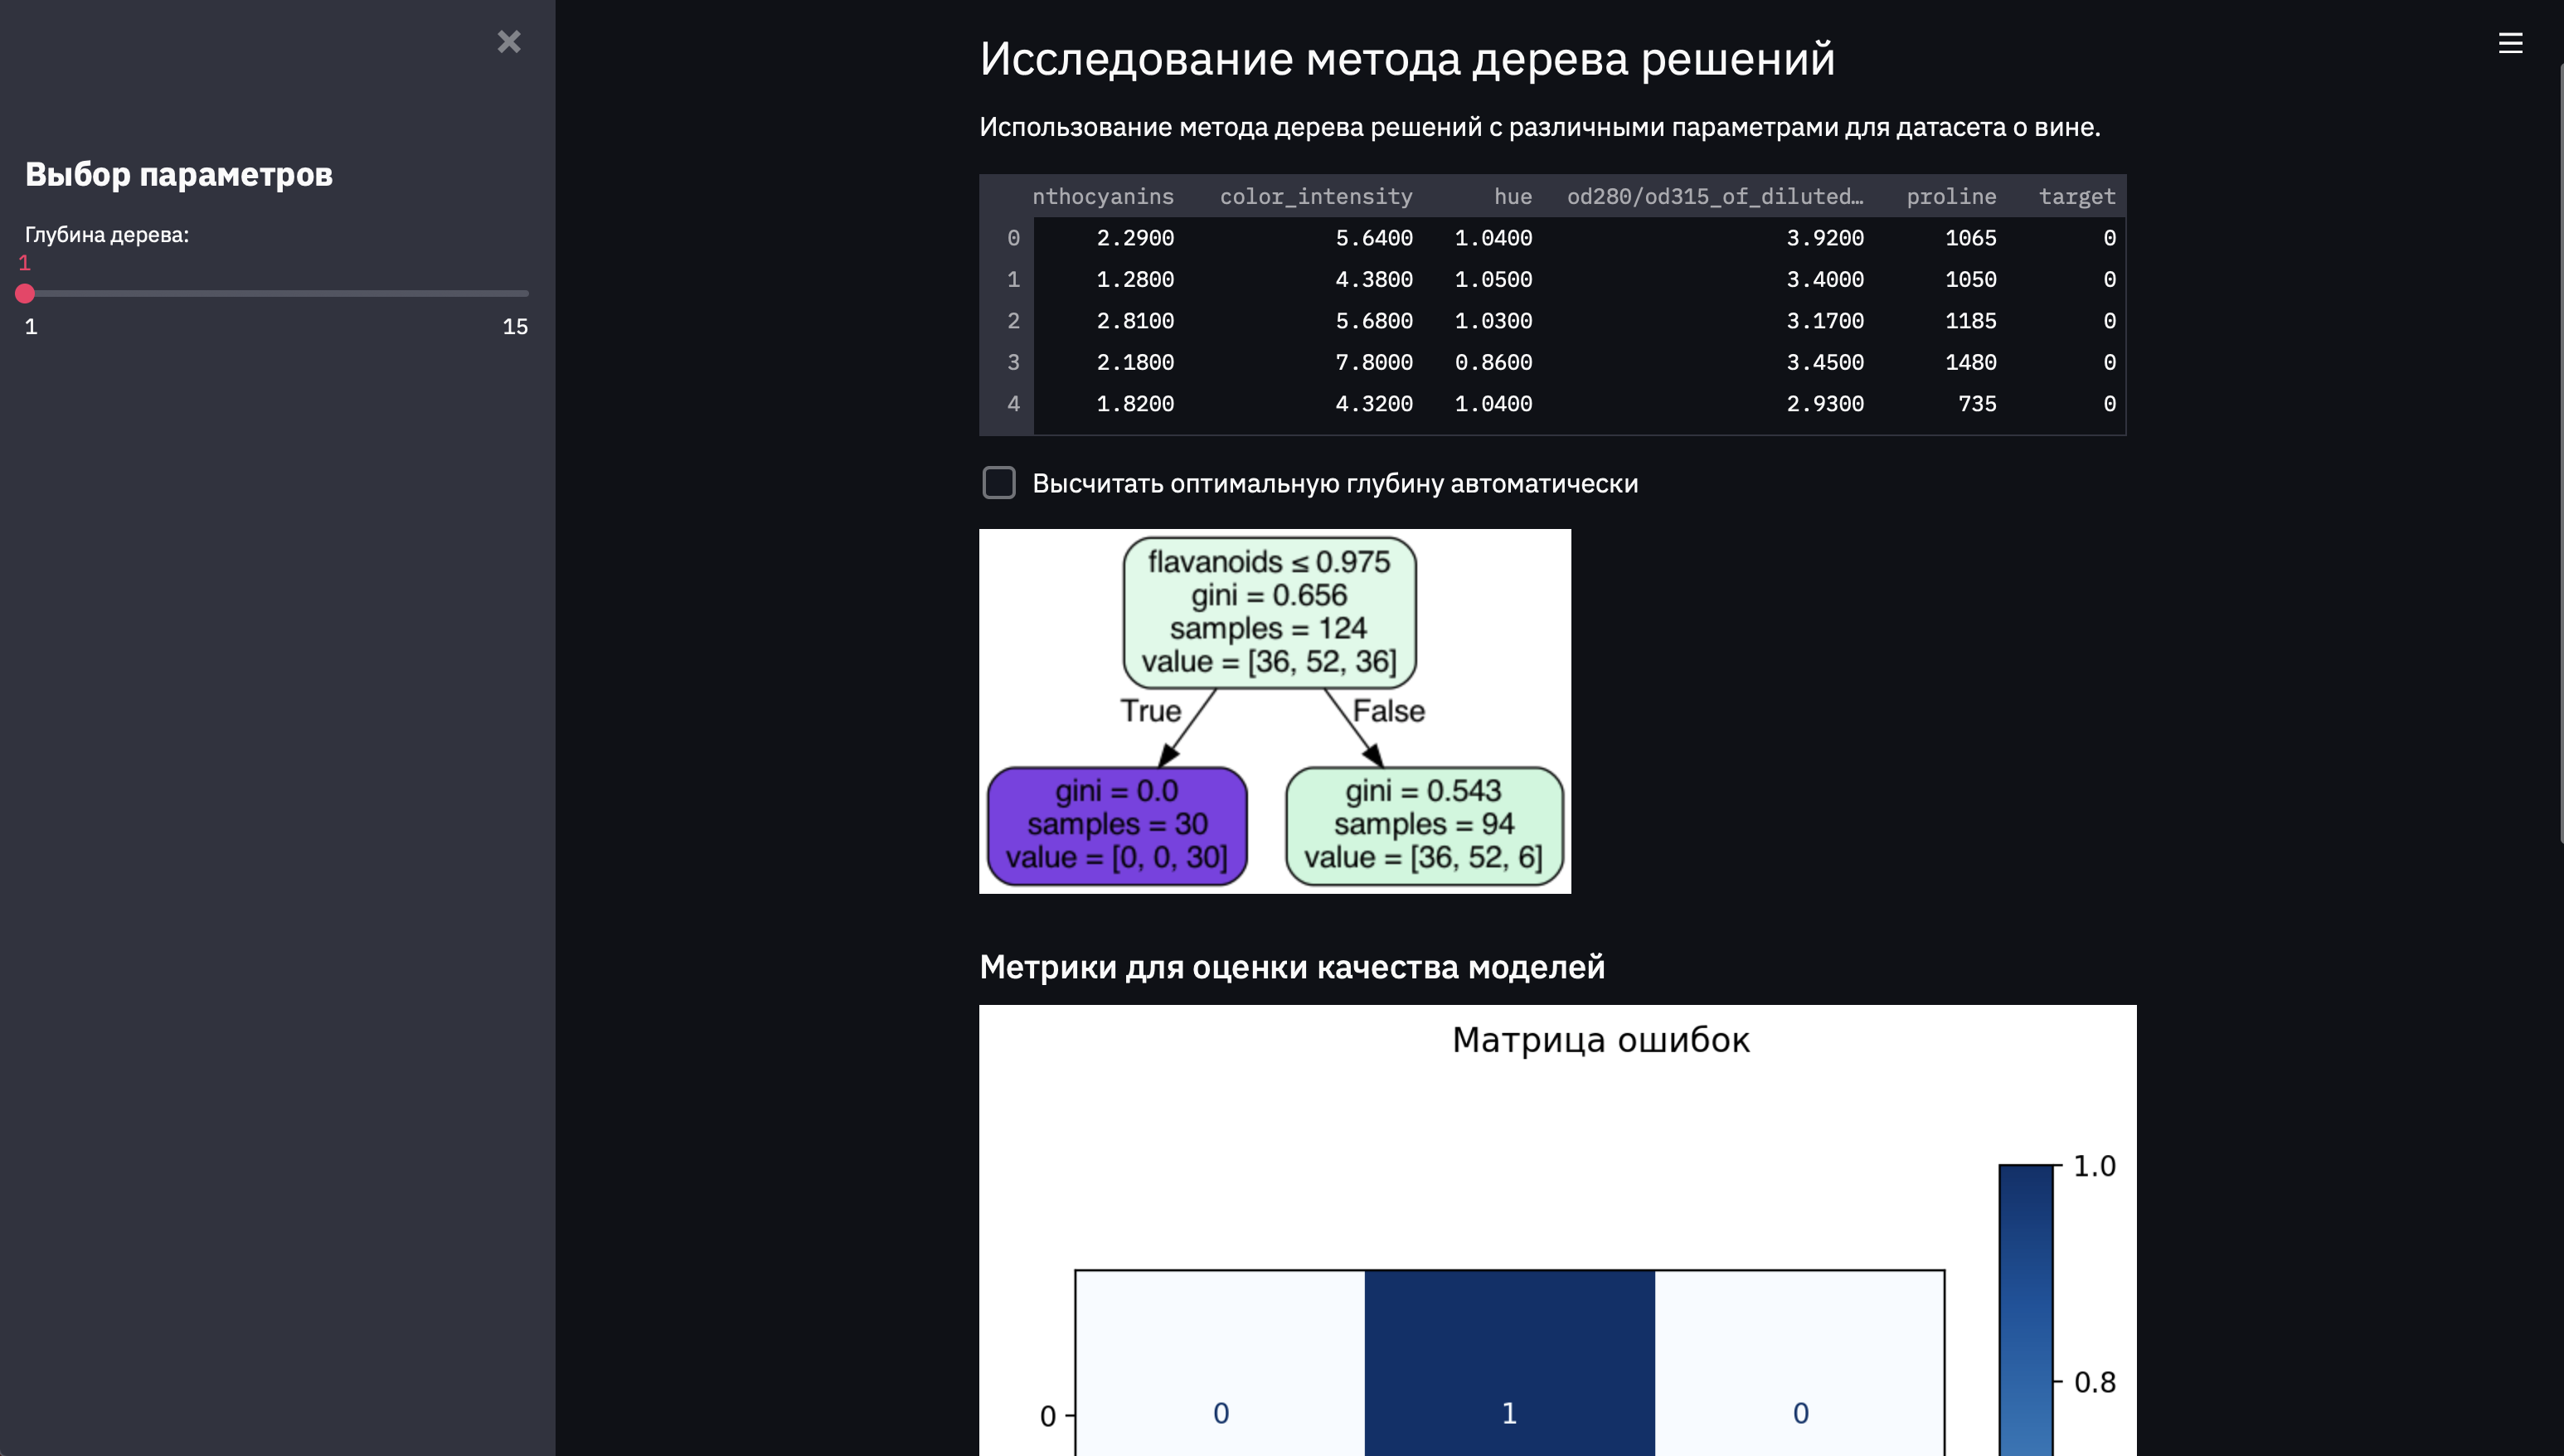

In [6]:
Image("img/second.png")

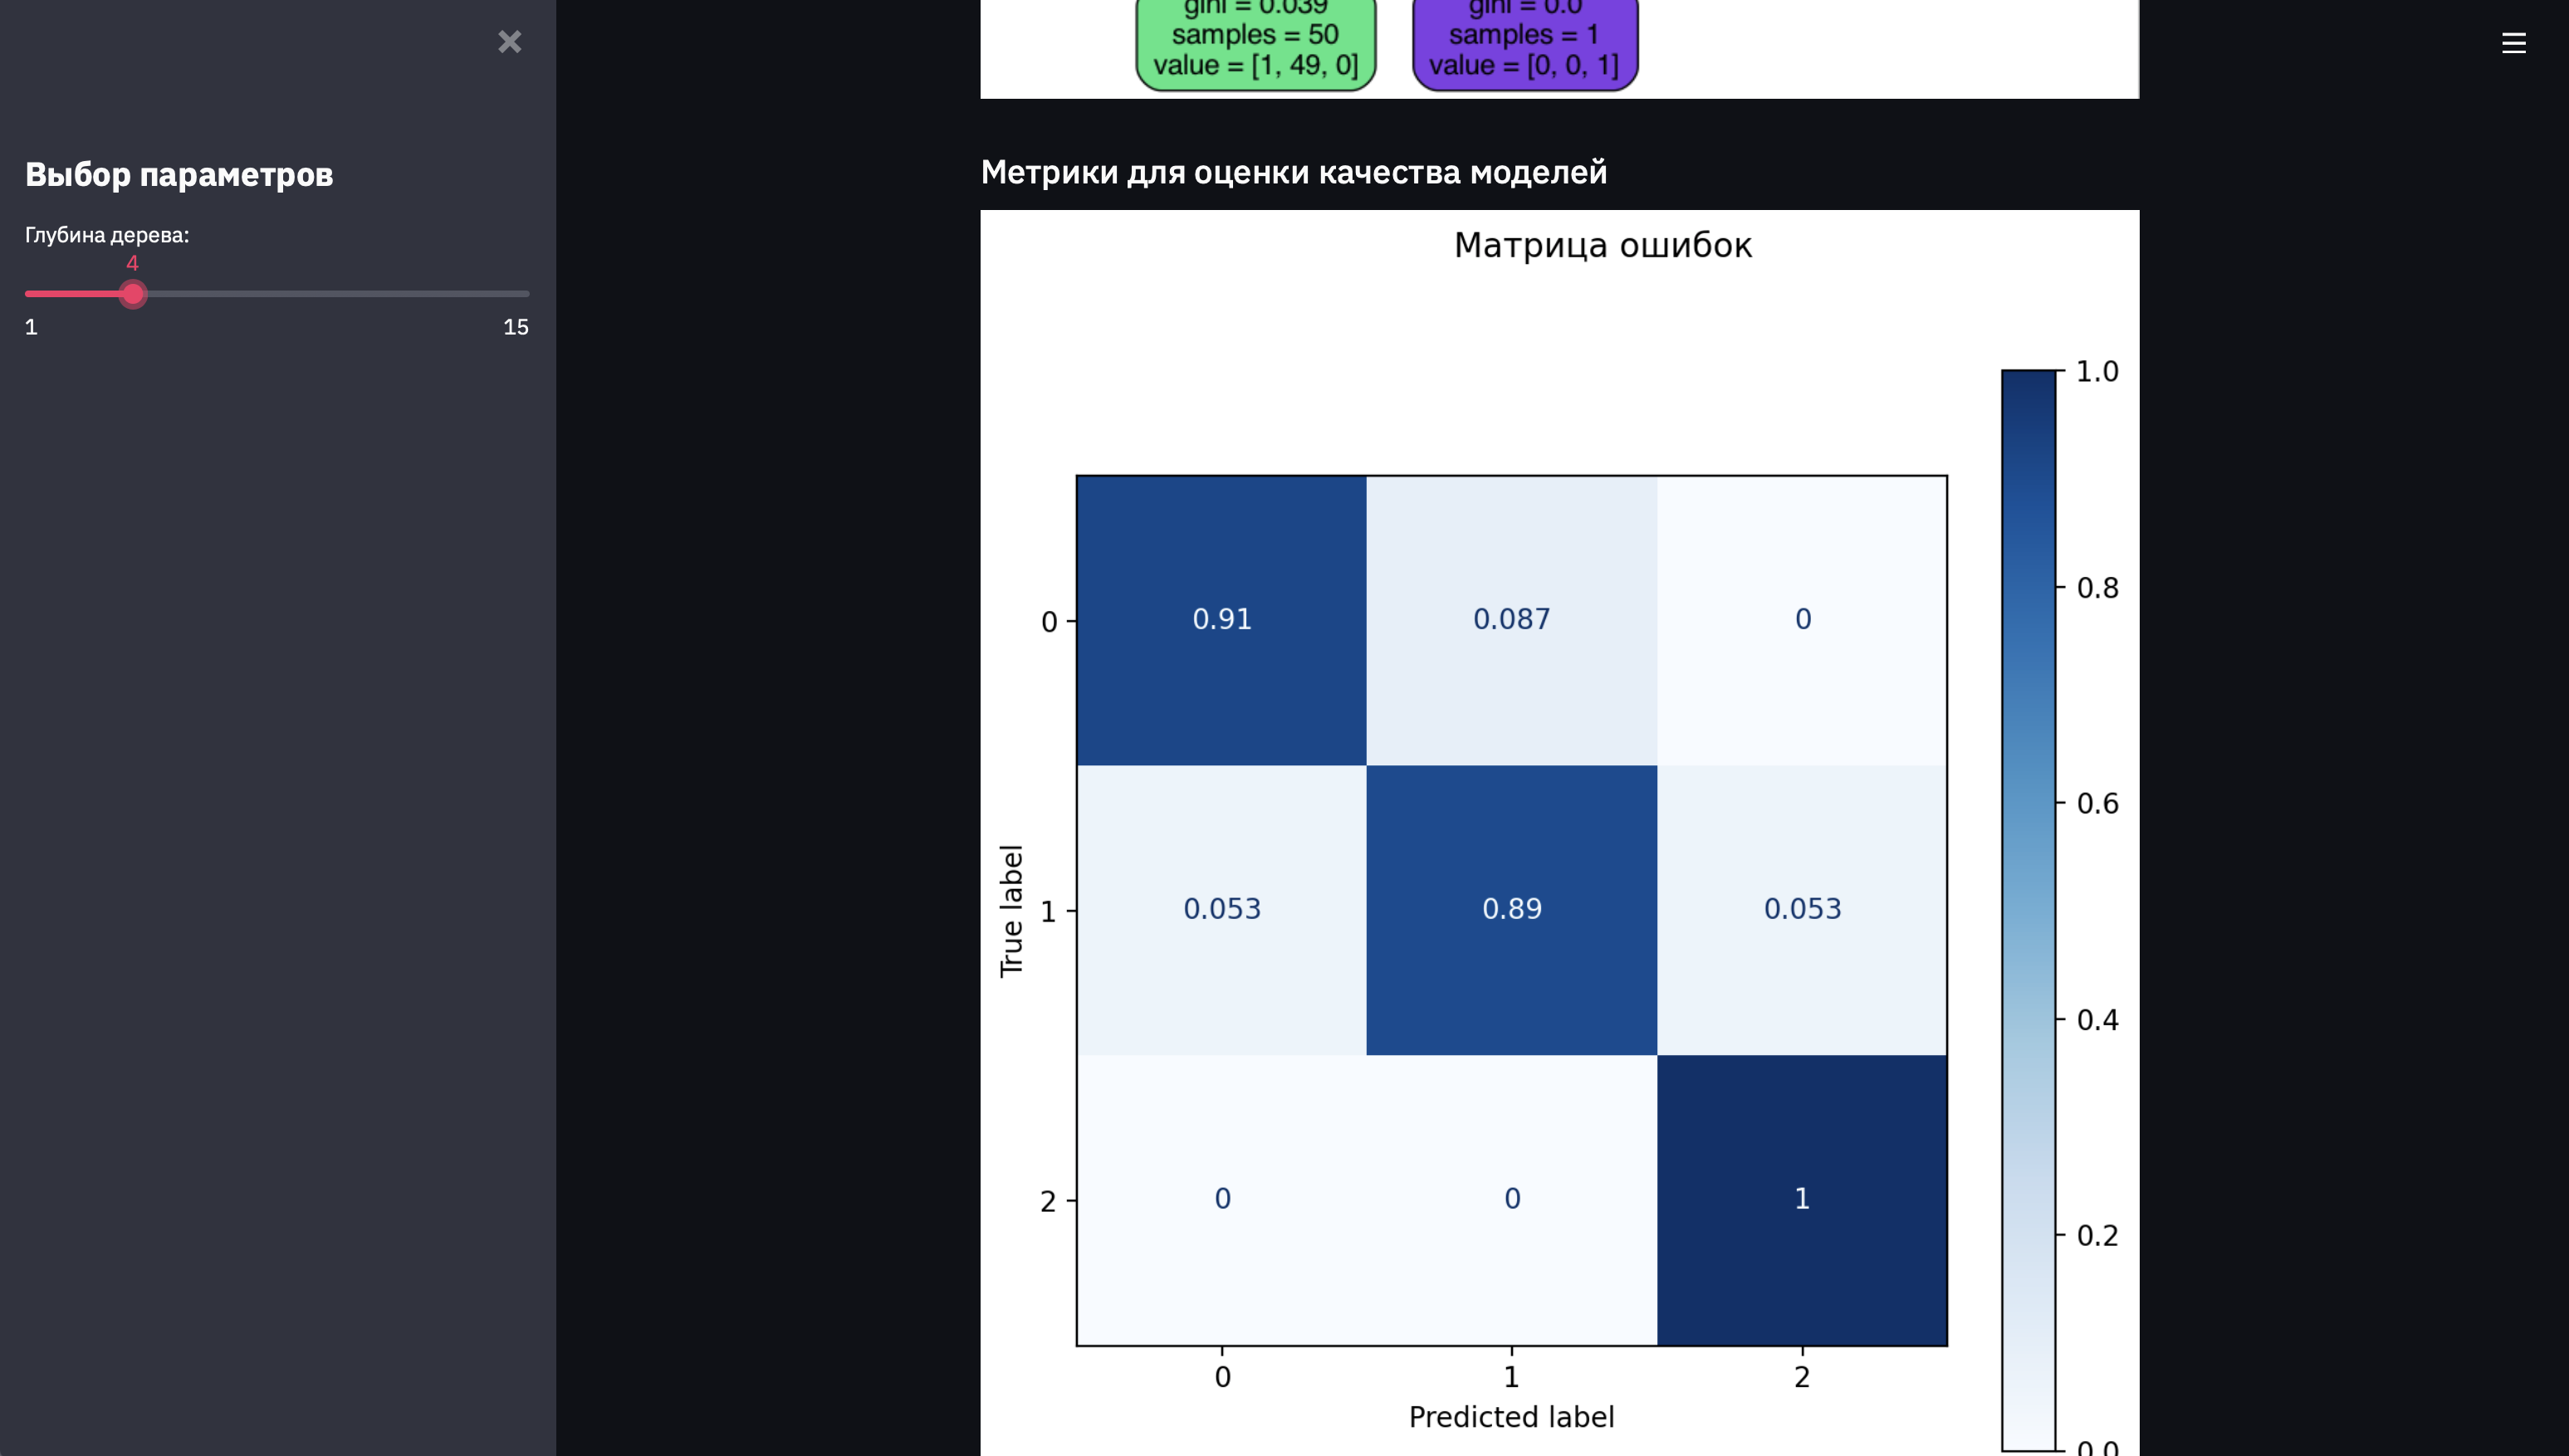

In [7]:
Image("img/third.png")